### PT – Base Balanceada e Treinamento Multiclasse

O dataset foi balanceado com as classes:  
- 'phantom_billing'  
- 'upcoding'  
- 'duplicidade_pagamento'  
- 'regular'  

Agora estamos prontos para treinar um **modelo de Machine Learning multiclasses**, capaz de classificar cada registro em uma dessas quatro categorias.  

✅ **Algoritmo recomendado:** Random Forest Classifier, pois:  
- Funciona bem para dados tabulares  
- Suporta classificação multiclasse  
- Tolera variáveis em diferentes escalas  
- É interpretável e robusto  

---

### EN – Balanced Dataset and Multiclass Training

The dataset has been balanced with the classes:  
- 'phantom_billing'  
- 'upcoding'  
- 'duplicidade_pagamento'  
- 'regular'  

We are now ready to train a **multiclass Machine Learning model**, capable of classifying each record into one of these four categories.  

✅ **Recommended algorithm:** Random Forest Classifier, because it:  
- Works well with tabular data  
- Supports multiclass classification  
- Handles features with different scales  
- Is interpretable and robust


In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# 1. Carregar o CSV
df = pd.read_csv('dados_balanceados_SMOTE.csv')

# 2. Separar X e y
X = df.drop('fraude_tipo', axis=1)
y = df['fraude_tipo']

# 3. Codificar o target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 4. Treinar o modelo (dados completos, já balanceados e divididos externamente)
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X, y_encoded)

# 5. Visualizar rótulos das classes
print("Classes codificadas:", dict(zip(le.classes_, le.transform(le.classes_))))

Classes codificadas: {'duplicidade_pagamento': np.int64(0), 'phantom_billing': np.int64(1), 'regular': np.int64(2), 'upcoding': np.int64(3)}



📊 Relatório de Classificação:

                       precision    recall  f1-score   support

duplicidade_pagamento       1.00      0.98      0.99      6368
      phantom_billing       1.00      1.00      1.00      6368
              regular       0.97      0.95      0.96      6368
             upcoding       0.95      0.99      0.97      6368

             accuracy                           0.98     25472
            macro avg       0.98      0.98      0.98     25472
         weighted avg       0.98      0.98      0.98     25472



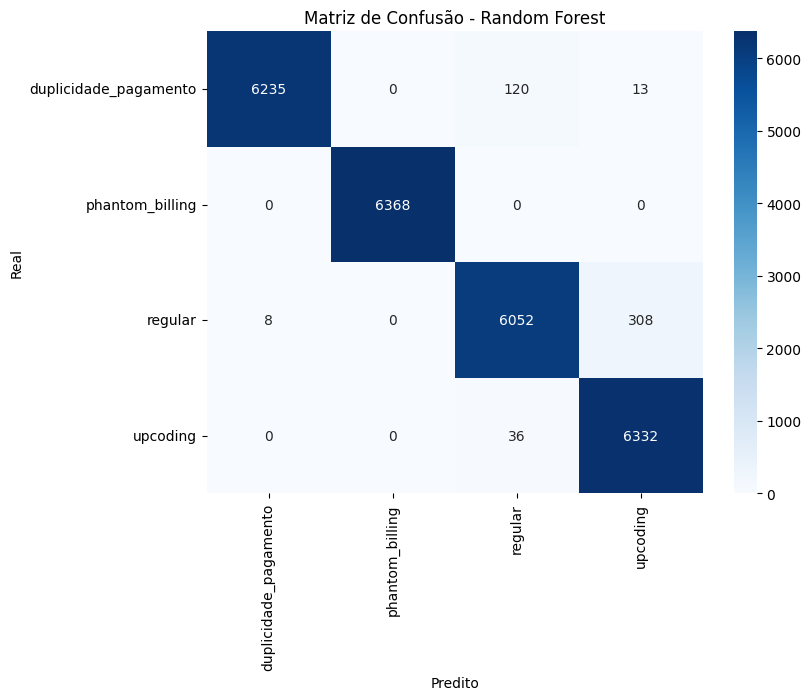

In [2]:
from sklearn.model_selection import cross_val_predict
import seaborn as sns
import matplotlib.pyplot as plt

# 1.1 Validação cruzada com predição
y_pred = cross_val_predict(modelo, X, y_encoded, cv=5)

# 1.2 Relatório de classificação
print("\n📊 Relatório de Classificação:\n")
print(classification_report(y_encoded, y_pred, target_names=le.classes_))

# 1.3 Matriz de Confusão
cm = confusion_matrix(y_encoded, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Random Forest")
plt.show()

1️⃣ VISÃO GERAL DO MODELO:

Accuracy geral: 0.98 → O modelo acertou 98% das previsões, o que é excelente.

Número de amostras: 25.472, com cada classe igualmente representada (6.368 cada), provavelmente devido ao balanceamento com SMOTE.

2️⃣ Métricas por classe

duplicidade_pagamento: f1-score 0.99

Excelente desempenho; o modelo identifica quase todos os casos de duplicidade, com poucos falsos negativos.

phantom_billing: f1-score 1.00

Perfeito; o modelo conseguiu classificar todos os registros corretamente.

regular: f1-score 0.96

Muito bom, mas alguns registros “regulares” foram confundidos com fraudes (provavelmente upcoding ou duplicidade).

upcoding: f1-score 0.97

Bom desempenho; o recall alto (0.99) indica que o modelo quase não deixou passar casos de upcoding, mas alguns registros foram classificados erroneamente, afetando a precisão (0.95).

3️⃣ INSIGTHS

O modelo está performando muito bem para todas as classes, especialmente phantom_billing e duplicidade_pagamento.

Classes “mais sutis” como upcoding e regular têm pequenas confusões, provavelmente porque os padrões de upcoding podem se assemelhar a registros regulares ou outros tipos de fraude.

O balanceamento com SMOTE ajudou a garantir que todas as classes fossem bem representadas no treino, evitando viés para classes majoritárias.

Com um f1-score médio de 0.98, este modelo é confiável para identificar fraudes sintéticas em um cenário controlado.

1️⃣ MODEL OVERVIEW

Overall Accuracy: 0.98 → The model correctly predicted 98% of the cases, which is excellent.

Number of samples: 25,472, with each class equally represented (6,368 each), likely due to SMOTE balancing.

2️⃣ Class-wise Metrics

duplicidade_pagamento: f1-score 0.99
Excellent performance; the model identifies almost all duplicate cases with few false negatives.

phantom_billing: f1-score 1.00
Perfect; the model correctly classified all records.

regular: f1-score 0.96
Very good, but some “regular” records were confused with fraud (likely upcoding or duplicidade).

upcoding: f1-score 0.97
Good performance; the high recall (0.99) indicates the model rarely misses upcoding cases, but some records were misclassified, slightly affecting precision (0.95).

3️⃣ INSIGHTS

The model performs very well across all classes, especially phantom_billing and duplicidade_pagamento.

“Subtler” classes like upcoding and regular show minor confusion, likely because upcoding patterns can resemble regular records or other types of fraud.

SMOTE balancing helped ensure all classes were well-represented in training, avoiding bias toward majority classes.

With an average f1-score of 0.98, this model is reliable for identifying synthetic frauds in a controlled scenario.